## University of Bahrain
### ITCS 494 - ML - Selected Topics in Computer Science
### Assignment 4

#### RAMSHA KHALID MUHAMMAD KHALID - 20168013

Problem

* The aim of this lab assignment is to apply your knowledge from neural networks (Lecture 6) to design a classifier for Arabic handwritten digits. The assignment will not require students to implement neurons from scratch, but instead we will be using existing ANN libraries in Python to achieve the task.



Dataset

* Please visit the following website to download the dataset http://datacenter.aucegypt.edu/shazeem/

* Use MADBase datasets



* Tasks

1.Build a suitable model using Keras and train it using the MADBase dataset

2.Try at least three of each Keras options below for each attempt (you can choose which three you want to try) for a total of 9 models:

* Loss functions (https://keras.io/api/losses/)

* Optimizers (https://keras.io/api/optimizers/)

3.Evaluate the success rate by calculating the success rate using the test dataset for each combination of choices in point 2 and print it in a table (for metrics, use the Accuracy class)

4.Write down your conclusions from the experiment

In [1]:
#import libraries

from PIL import Image
import numpy as np
import pathlib
import random
from os import listdir
from sklearn.utils import shuffle
from tabulate import tabulate
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
train_zeros = listdir("Training/ZERO")
train_ones = listdir("Training/ONE")
train_twos = listdir("Training/TWO")
train_threes = listdir("Training/THREE")
train_fours = listdir("Training/FOUR")
train_fives = listdir("Training/FIVE")
train_sixes = listdir("Training/SIX")
train_sevens = listdir("Training/SEVEN")
train_eights = listdir("Training/EIGHT")
train_nines = listdir("Training/NINE")

train_data = []
train_label = []

def getImage(link):
    an_image = Image.open(link)
    image_sequence = an_image.getdata()
    image_array = np.array(image_sequence)
    image_array = np.reshape(image_array, (28,28))
    
    return image_array

print("Reading Train Zeros...")
#read all ones and append to training array
for image in train_zeros:
    link = "Training/ZERO/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        train_data.append(img)
        train_label.append(0)

print("Reading Train Oness...")
#read all ones and append to training array
for image in train_ones:
    link = "Training/ONE/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        train_data.append(img)
        train_label.append(1)

print("Reading Train Twos...")
#read all ones and append to training array
for image in train_twos:
    link = "Training/TWO/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        train_data.append(img)
        train_label.append(2)
        
print("Reading Train Threes...")
#read all ones and append to training array
for image in train_threes:
    link = "Training/THREE/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        train_data.append(img)
        train_label.append(3)

print("Reading Train Fours...")
#read all ones and append to training array
for image in train_fours:
    link = "Training/FOUR/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        train_data.append(img)
        train_label.append(4)

print("Reading Train Fives...")
#read all ones and append to training array
for image in train_fives:
    link = "Training/FIVE/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        train_data.append(img)
        train_label.append(5)

print("Reading Train Sixes...")
#read all ones and append to training array
for image in train_sixes:
    link = "Training/SIX/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        train_data.append(img)
        train_label.append(6)

print("Reading Train Sevens...")        
#read all ones and append to training array
for image in train_sevens:
    link = "Training/SEVEN/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        train_data.append(img)
        train_label.append(7)

print("Reading Train Eights...")        
#read all ones and append to training array
for image in train_eights:
    link = "Training/EIGHT/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        train_data.append(img)
        train_label.append(8)

print("Reading Train Nines...")        
#read all ones and append to training array
for image in train_nines:
    link = "Training/NINE/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        train_data.append(img)
        train_label.append(9)

train_data = np.array(train_data)
train_data.shape

Reading Train Zeros...
Reading Train Oness...
Reading Train Twos...
Reading Train Threes...
Reading Train Fours...
Reading Train Fives...
Reading Train Sixes...
Reading Train Sevens...
Reading Train Eights...
Reading Train Nines...


(60000, 28, 28)

In [3]:
test_zeros = listdir("Testing/ZERO")
test_ones = listdir("Testing/ONE")
test_twos = listdir("Testing/TWO")
test_threes = listdir("Testing/THREE")
test_fours = listdir("Testing/FOUR")
test_fives = listdir("Testing/FIVE")
test_sixes = listdir("Testing/SIX")
test_sevens = listdir("Testing/SEVEN")
test_eights = listdir("Testing/EIGHT")
test_nines = listdir("Testing/NINE")

test_data = []
test_label = []

print("Reading Test Zeros...")
#read all ones and append to training array
for image in test_zeros:
    link = "Testing/ZERO/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        test_data.append(img)
        test_label.append(0)

print("Reading Test Ones...")        
#read all ones and append to training array
for image in test_ones:
    link = "Testing/ONE/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        test_data.append(img)
        test_label.append(1)

print("Reading Test Twos...")        
#read all ones and append to training array
for image in test_twos:
    link = "Testing/TWO/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        test_data.append(img)
        test_label.append(2)

print("Reading Test Threes...")        
#read all ones and append to training array
for image in test_threes:
    link = "Testing/THREE/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        test_data.append(img)
        test_label.append(3)

print("Reading Test Fours...")        
#read all ones and append to training array
for image in test_fours:
    link = "Testing/FOUR/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        test_data.append(img)
        test_label.append(4)

print("Reading Test Fives...")        
#read all ones and append to training array
for image in test_fives:
    link = "Testing/FIVE/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        test_data.append(img)
        test_label.append(5)

print("Reading Test Sixes...")        
#read all ones and append to training array
for image in test_sixes:
    link = "Testing/SIX/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        test_data.append(img)
        test_label.append(6)

print("Reading Test Sevens...")        
#read all ones and append to training array
for image in test_sevens:
    link = "Testing/SEVEN/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        test_data.append(img)
        test_label.append(7)

print("Reading Test Eights...")        
#read all ones and append to training array
for image in test_eights:
    link = "Testing/EIGHT/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        test_data.append(img)
        test_label.append(8)

print("Reading Test Nines...")        
#read all ones and append to training array
for image in test_nines:
    link = "Testing/NINE/" + image
    if(link.endswith('bmp')):
        img = getImage(link)
        test_data.append(img)
        test_label.append(9)

test_data = np.array(test_data)
test_data.shape

Reading Test Zeros...
Reading Test Ones...
Reading Test Twos...
Reading Test Threes...
Reading Test Fours...
Reading Test Fives...
Reading Test Sixes...
Reading Test Sevens...
Reading Test Eights...
Reading Test Nines...


(10000, 28, 28)

In [4]:
class_names = ['ZERO', 'ONE', 'TWO', 'THREE', 'FOUR','FIVE', 'SIX', 'SEVEN', 'EIGHT', 'NINE']

In [5]:
#random shuffle the training and testing arrays

train_data, train_label = shuffle(train_data, train_label)
test_data, test_label = shuffle(test_data, test_label)

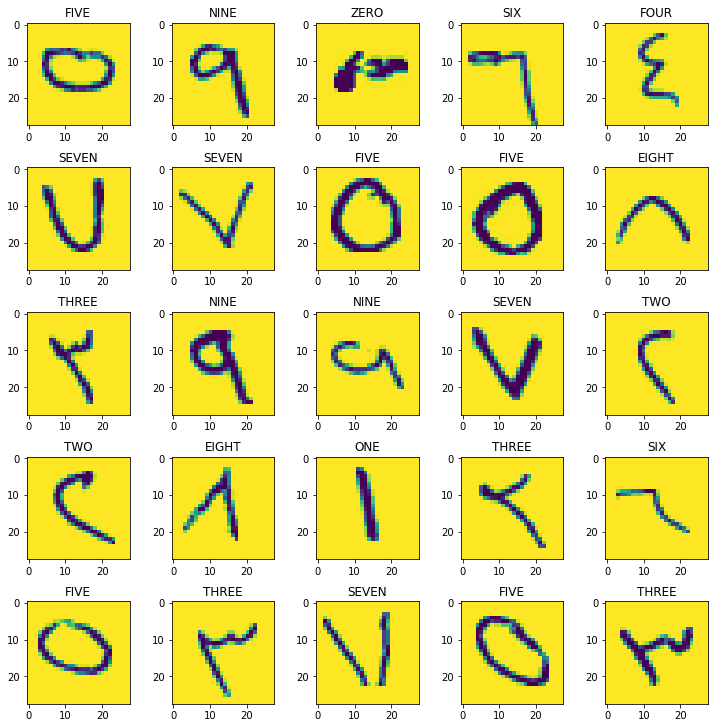

In [6]:
#display test images with labels
_, axs = plt.subplots(5,5, figsize=(10, 10), constrained_layout=True)
axs = axs.flatten()
i = 0
for img, label, ax in zip(test_data[:25], test_label[:25], axs):
    ax.set_title(class_names[label])
    ax.imshow(img)
plt.show()

In [7]:
#pre-process the images
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

## Building Models

##### Model A 
##### Loss - Sparse 
##### Optimizer - Adam

In [8]:
#build the model
model_adam_sparse = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='sigmoid'),  # hidden layer (2)
    keras.layers.Dense(10, activation='sigmoid') # output layer (3)
])

#compile model
model_adam_sparse.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fit model
model_adam_sparse.fit(train_data, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6941 - accuracy: 0.8272
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1583 - accuracy: 0.9536
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1348 - accuracy: 0.9606
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1161 - accuracy: 0.9665
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1064 - accuracy: 0.9692
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0963 - accuracy: 0.9722
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0934 - accuracy: 0.9721
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9752
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0812 - accuracy: 0.9769
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.075

In [9]:
test_loss_a, test_acc_a = model_adam_sparse.evaluate(test_data,  test_label, verbose=1) 

313/313 [==============================] - 1s 1ms/step - loss: 0.0983 - accuracy: 0.9711


##### Model B 
##### Loss - Poisson
##### Optimizer - Adam

In [10]:
#build the model
model_adam_poisson = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='sigmoid'),  # hidden layer (2)
    keras.layers.Dense(10, activation='sigmoid') # output layer (3)
])

#compile model
model_adam_poisson.compile(optimizer='adam', loss='Poisson', metrics=['accuracy'])

#fit model
model_adam_poisson.fit(train_data, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0667 - accuracy: 0.1016
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0003 - accuracy: 0.0979
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0001 - accuracy: 0.0991
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0000 - accuracy: 0.1006
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0000 - accuracy: 0.0997
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0000 - accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.1015
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.1039
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.0723
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.000

In [11]:
test_loss_b, test_acc_b = model_adam_poisson.evaluate(test_data,  test_label, verbose=1) 

313/313 [==============================] - 1s 2ms/step - loss: 1.0000 - accuracy: 0.0663


##### Model C
##### Loss - KL Divergence
##### Optimizer - Adam

In [12]:
#build the model
model_adam_kl = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='sigmoid'),  # hidden layer (2)
    keras.layers.Dense(10, activation='sigmoid') # output layer (3)
])

#compile model
model_adam_kl.compile(optimizer='adam', loss='kl_divergence', metrics=['accuracy'])

#fit model
model_adam_kl.fit(train_data, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1865 - accuracy: 0.1023
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.3452e-04 - accuracy: 0.0989
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2439e-04 - accuracy: 0.0990
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 7.2797e-05 - accuracy: 0.1020
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5819e-05 - accuracy: 0.0999
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 8.8575e-06 - accuracy: 0.0995
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3966e-06 - accuracy: 0.0981
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: -2.5560e-07 - accuracy: 0.1021
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: -1.5962e-06 - accuracy: 0.0727
Epoch 10/10
1875/1875 [=========================

In [13]:
test_loss_c, test_acc_c = model_adam_kl.evaluate(test_data,  test_label, verbose=1) 

313/313 [==============================] - 1s 1ms/step - loss: -1.6114e-06 - accuracy: 0.0864


##### Model D
##### Loss - Sparse 
##### Optimizer - SGD

In [14]:
#build the model
model_sgd_sparse = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='sigmoid'),  # hidden layer (2)
    keras.layers.Dense(10, activation='sigmoid') # output layer (3)
])

#compile model
model_sgd_sparse.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fit model
model_sgd_sparse.fit(train_data, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7949 - accuracy: 0.6089
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5843 - accuracy: 0.9197
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3488 - accuracy: 0.9342
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9410
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2323 - accuracy: 0.9475
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2099 - accuracy: 0.9495
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1926 - accuracy: 0.9526
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1784 - accuracy: 0.9535
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1692 - accuracy: 0.9560
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.165

In [15]:
test_loss_d, test_acc_d = model_sgd_sparse.evaluate(test_data,  test_label, verbose=1) 

313/313 [==============================] - 1s 1ms/step - loss: 0.1816 - accuracy: 0.9504


##### Model E
##### Loss - Poisson
##### Optimizer - SGD

In [16]:
#build the model
model_sgd_poisson = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='sigmoid'),  # hidden layer (2)
    keras.layers.Dense(10, activation='sigmoid') # output layer (3)
])

#compile model
model_sgd_poisson.compile(optimizer='SGD', loss='poisson', metrics=['accuracy'])

#fit model
model_sgd_poisson.fit(train_data, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1588 - accuracy: 0.0754
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0054 - accuracy: 0.0970
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0029 - accuracy: 0.1015
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0019 - accuracy: 0.1017
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0015 - accuracy: 0.1015
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0012 - accuracy: 0.1021
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0010 - accuracy: 0.1008
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0009 - accuracy: 0.1019
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0007 - accuracy: 0.1042
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.000

In [17]:
test_loss_e, test_acc_e = model_sgd_poisson.evaluate(test_data,  test_label, verbose=1) 

313/313 [==============================] - 1s 1ms/step - loss: 1.0006 - accuracy: 0.1050


##### Model F
##### Loss - KL Divergence 
##### Optimizer - SGD

In [18]:
#build the model
model_sgd_kl = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='sigmoid'),  # hidden layer (2)
    keras.layers.Dense(10, activation='sigmoid') # output layer (3)
])

#compile model
model_sgd_kl.compile(optimizer='SGD', loss='kl_divergence', metrics=['accuracy'])

#fit model
model_sgd_kl.fit(train_data, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1792 - accuracy: 0.0997
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0050 - accuracy: 0.1091
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0027 - accuracy: 0.1083
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0018 - accuracy: 0.1068
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.1056
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0011 - accuracy: 0.1037
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.3467e-04 - accuracy: 0.1054
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 8.0073e-04 - accuracy: 0.1076
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 7.0345e-04 - accuracy: 0.1042
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step -

In [19]:
test_loss_f, test_acc_f = model_sgd_kl.evaluate(test_data,  test_label, verbose=1) 

313/313 [==============================] - 1s 2ms/step - loss: 5.7570e-04 - accuracy: 0.1070


##### Model G
##### Loss - Sparse 
##### Optimizer - RMS Prop

In [20]:
#build the model
model_rms_sparse = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='sigmoid'),  # hidden layer (2)
    keras.layers.Dense(10, activation='sigmoid') # output layer (3)
])

#compile model
model_rms_sparse.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fit model
model_rms_sparse.fit(train_data, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7353 - accuracy: 0.7893
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1753 - accuracy: 0.9476
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1433 - accuracy: 0.9567
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1244 - accuracy: 0.9628
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1104 - accuracy: 0.9671
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1067 - accuracy: 0.9682
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0970 - accuracy: 0.9709
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0937 - accuracy: 0.9722
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0911 - accuracy: 0.9742
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.079

In [21]:
test_loss_g, test_acc_g = model_rms_sparse.evaluate(test_data,  test_label, verbose=1) 

313/313 [==============================] - 1s 1ms/step - loss: 0.1027 - accuracy: 0.9715


##### Model H
##### Loss - Poisson
##### Optimizer - RMS Prop

In [22]:
#build the model
model_rms_poisson = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='sigmoid'),  # hidden layer (2)
    keras.layers.Dense(10, activation='sigmoid') # output layer (3)
])

#compile model
model_rms_poisson.compile(optimizer='RMSprop', loss='poisson', metrics=['accuracy'])

#fit model
model_rms_poisson.fit(train_data, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0279 - accuracy: 0.0847
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.0757
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.0644
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.0717
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.0748
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.0679
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.0639
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0000 - accuracy: 0.0778
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.0770
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.000

In [23]:
test_loss_h, test_acc_h = model_rms_poisson.evaluate(test_data,  test_label, verbose=1) 

313/313 [==============================] - 1s 2ms/step - loss: 1.0000 - accuracy: 0.0860


##### Model I
##### Loss - KL Divergence
##### Optimizer - RMS Prop

In [24]:
#build the model
model_rms_kl = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='sigmoid'),  # hidden layer (2)
    keras.layers.Dense(10, activation='sigmoid') # output layer (3)
])

#compile model
model_rms_kl.compile(optimizer='RMSprop', loss='kl_divergence', metrics=['accuracy'])

#fit model
model_rms_kl.fit(train_data, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0906 - accuracy: 0.1033
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: -1.6146e-06 - accuracy: 0.0994
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: -1.6033e-06 - accuracy: 0.0988
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: -1.6158e-06 - accuracy: 0.0993
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: -1.6107e-06 - accuracy: 0.0988
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: -1.5513e-06 - accuracy: 0.0954
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: -1.5886e-06 - accuracy: 0.0975
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: -1.6096e-06 - accuracy: 0.0988
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: -1.6058e-06 - accuracy: 0.0984
Epoch 10/10
1875/1875 [===================

In [25]:
test_loss_i, test_acc_i = model_rms_kl.evaluate(test_data,  test_label, verbose=1) 

313/313 [==============================] - 1s 1ms/step - loss: -1.6118e-06 - accuracy: 0.0995


### Accuracy Percentage Table

In [26]:
accuracy_table = []
accuracy_table.append(['','sparse categorical crossentropy','Poisson','KL Divergence'])

accuracy_table.append(['Adam',str(np.round(test_acc_a*100,2))+"%",str(np.round(test_acc_b*100,2))+"%",str(np.round(test_acc_c*100,2))+"%"])
accuracy_table.append(['SGD',str(np.round(test_acc_d*100,2))+"%",str(np.round(test_acc_e*100,2))+"%",str(np.round(test_acc_f*100,2))+"%"])
accuracy_table.append(['RMS Prop',str(np.round(test_acc_g*100,2))+"%",str(np.round(test_acc_h*100,2))+"%",str(np.round(test_acc_i*100,2))+"%"])

In [27]:
print(tabulate(accuracy_table,headers="firstrow", tablefmt="orgtbl", colalign=("center", "center", "center", "center")))

|          |  sparse categorical crossentropy  |  Poisson  |  KL Divergence  |
|----------+-----------------------------------+-----------+-----------------|
|   Adam   |              97.11%               |   6.63%   |      8.64%      |
|   SGD    |              95.04%               |   10.5%   |      10.7%      |
| RMS Prop |              97.15%               |   8.6%    |      9.95%      |


### Visual Predictions
Since the model with best accuracy is RMS_Sparce model, therefore that'll be used to visualize the predictions

In [31]:
predictions = model_rms_sparse.predict(test_data)

In [32]:
predict_labels = []
for predict in predictions:
    predict_labels.append(np.argmax(predict))

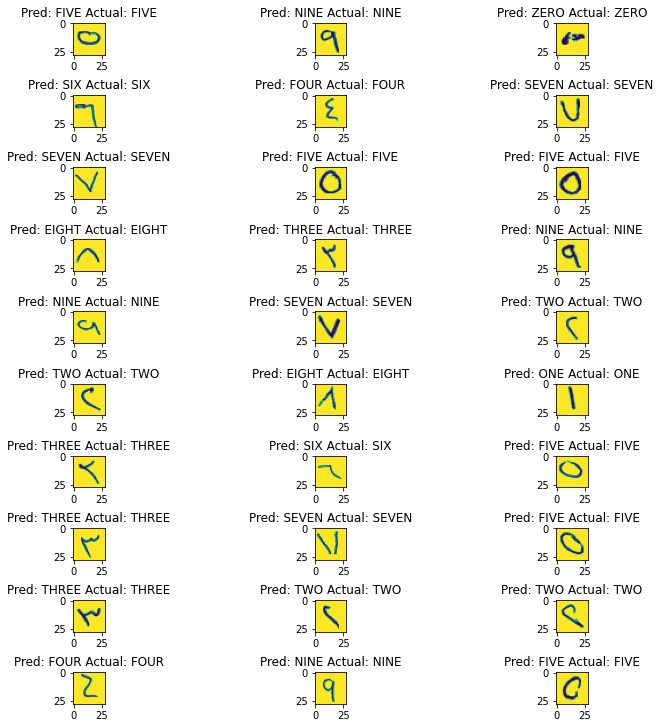

In [33]:
_, axs = plt.subplots(10,3, figsize=(10, 10), constrained_layout=True)
axs = axs.flatten()
i = 0
for img, pred_label, actual_label, ax in zip(test_data[:30], predict_labels[:30], test_label[:30], axs):
    title = "Pred: " + class_names[pred_label] + " Actual: " + class_names[actual_label]
    ax.set_title(title)
    ax.imshow(img)
plt.show()

## Conclusion
On comparing the accuracy percentages of 9 different models built using different pairs of optimization and loss function, the results show that models built with sparse categorical crossentropy loss function performed well and had 95 - 97 % test accuracy as compared to other models who showed maximum accuracy of 6 - 11 %.
The model with optimization function RMSProp and loss function sparse categorical performed the best and gave 97.15% accuracy.